<a href="https://colab.research.google.com/github/UmaGhildiyal/Deep_Neural_Networks_YT/blob/main/16_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install — target=”/content/drive/MyDrive/Colab Notebooks/Yolo8” ultralytics

In [1]:
# Clone the darknet repository
!git clone https://github.com/AlexeyAB/darknet
%cd darknet

# Update the Makefile to enable GPU, OpenCV, and CUDNN
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

# Build the darknet
!make


Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15851 (delta 5), reused 13 (delta 4), pack-reused 15833
Receiving objects: 100% (15851/15851), 14.42 MiB | 13.85 MiB/s, done.
Resolving deltas: 100% (10671/10671), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https

In [2]:
# Download the pre-trained YOLO weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-07-01 17:41:50--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  17.1MB/s    in 15s     

2024-07-01 17:42:06 (15.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [4]:
#download Images
!wget -O data/spg1.jpg https://i.pinimg.com/564x/10/f8/93/10f8931dcf14c6b7bc0cb7357f385ddf.jpg
!wget -O data/spg2.jpg https://i.pinimg.com/564x/a9/cb/38/a9cb389b08a007d6f6f7dd71796783da.jpg
!wget -O data/spg3.jpg https://i.pinimg.com/564x/57/f8/1b/57f81b8bf7f50be007223125376e0a51.jpg

--2024-07-01 17:42:16--  https://i.pinimg.com/564x/10/f8/93/10f8931dcf14c6b7bc0cb7357f385ddf.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.59.168.153, 23.52.171.224, 23.52.171.241, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.59.168.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62043 (61K) [image/jpeg]
Saving to: ‘data/spg1.jpg’

data/spg1.jpg       100%[===================>]  60.59K  --.-KB/s    in 0.002s  

2024-07-01 17:42:16 (30.2 MB/s) - ‘data/spg1.jpg’ saved [62043/62043]

--2024-07-01 17:42:16--  https://i.pinimg.com/564x/a9/cb/38/a9cb389b08a007d6f6f7dd71796783da.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.59.168.153, 23.52.171.224, 23.52.171.241, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.59.168.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78790 (77K) [image/jpeg]
Saving to: ‘data/spg2.jpg’

data/spg2.jpg       100%[===================>]  76.94K  --.-KB/s    in 0.002s  

2024-07-01 17:42:16 (30.2 M

In [10]:
!./darknet detect cfg/yolov3.cfg yolov3.weights -thresh 0.25 data/spg3.jpg

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

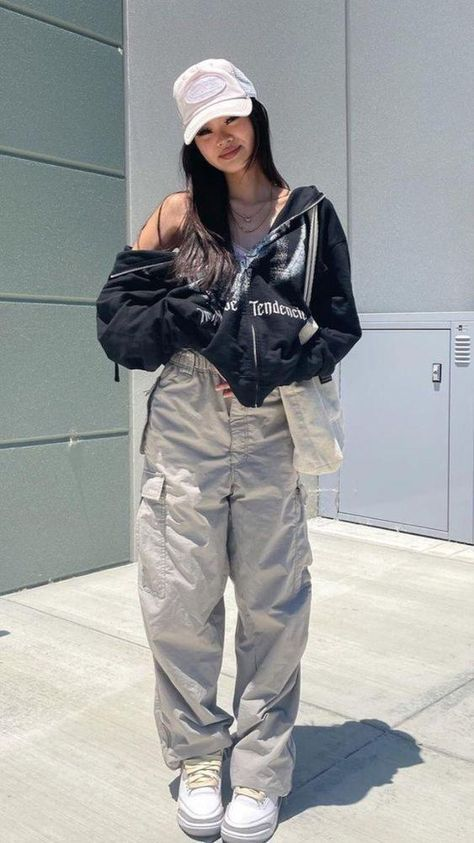

In [11]:
from google.colab.patches import cv2_imshow
import cv2

# Read the image
img = cv2.imread('spg1_pre.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

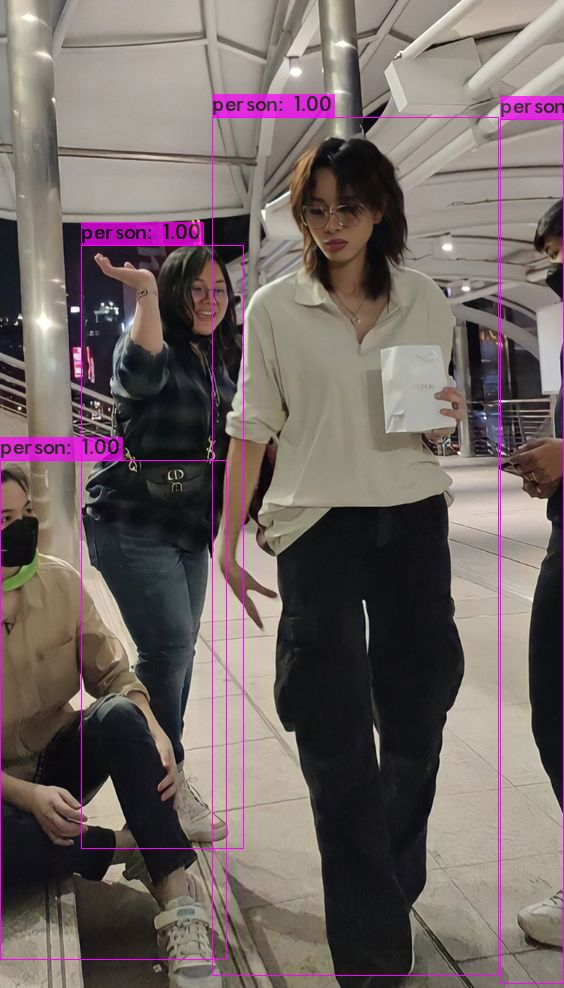

In [12]:
img = cv2.imread('predictions.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [17]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 21.2 MB/s eta 0:00:00


In [19]:
#download from Youtube
!yt-dlp -f 'bestvideo[height<=720]+bestaudio/best[height<=720]' -o '%(title)s.%(ext)s' --restrict-filenames https://www.youtube.com/shorts/k060zL8nzmU?feature=share

[youtube] Extracting URL: https://www.youtube.com/shorts/k060zL8nzmU?feature=share
[youtube] k060zL8nzmU: Downloading webpage
[youtube] k060zL8nzmU: Downloading ios player API JSON
[youtube] k060zL8nzmU: Downloading player 81a0fcab
[youtube] k060zL8nzmU: Downloading m3u8 information
[info] k060zL8nzmU: Downloading 1 format(s): 243+251
[download] Destination: Take_a_picture_beautiful_people_streetphotography_streetstylephotography.f243.webm
[download] 100% of  559.89KiB in 00:00:00 at 18.33MiB/s
[download] Destination: Take_a_picture_beautiful_people_streetphotography_streetstylephotography.f251.webm
[download] 100% of  440.65KiB in 00:00:00 at 14.80MiB/s
[Merger] Merging formats into "Take_a_picture_beautiful_people_streetphotography_streetstylephotography.webm"
Deleting original file Take_a_picture_beautiful_people_streetphotography_streetstylephotography.f251.webm (pass -k to keep)
Deleting original file Take_a_picture_beautiful_people_streetphotography_streetstylephotography.f243.we

In [24]:
# Load and print COCO labels from the coco.names file
with open('data/coco.names', 'r') as f:
    coco_labels = f.read().strip().split('\n')

for i, label in enumerate(coco_labels, start=1):
    print(f"{i}: {label}")


1: person
2: bicycle
3: car
4: motorbike
5: aeroplane
6: bus
7: train
8: truck
9: boat
10: traffic light
11: fire hydrant
12: stop sign
13: parking meter
14: bench
15: bird
16: cat
17: dog
18: horse
19: sheep
20: cow
21: elephant
22: bear
23: zebra
24: giraffe
25: backpack
26: umbrella
27: handbag
28: tie
29: suitcase
30: frisbee
31: skis
32: snowboard
33: sports ball
34: kite
35: baseball bat
36: baseball glove
37: skateboard
38: surfboard
39: tennis racket
40: bottle
41: wine glass
42: cup
43: fork
44: knife
45: spoon
46: bowl
47: banana
48: apple
49: sandwich
50: orange
51: broccoli
52: carrot
53: hot dog
54: pizza
55: donut
56: cake
57: chair
58: sofa
59: pottedplant
60: bed
61: diningtable
62: toilet
63: tvmonitor
64: laptop
65: mouse
66: remote
67: keyboard
68: cell phone
69: microwave
70: oven
71: toaster
72: sink
73: refrigerator
74: book
75: clock
76: vase
77: scissors
78: teddy bear
79: hair drier
80: toothbrush
